<div style="border:solid Chocolate 2px; padding: 40px">

<b> Данил, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Анализ лояльности пользователей Яндекс Афиши

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:


Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

In [1]:
!pip install dotenv
!pip install sqlalchemy

!pip install phik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from phik import phik_matrix
from sqlalchemy import create_engine
from dotenv import load_dotenv 
import os

In [3]:
load_dotenv(dotenv_path='.env')
# Конфиг подключения к БД:

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)

engine = create_engine(connection_string)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали, коннектор сделали - отлично!

In [ ]:
query = '''
SELECT user_id,
       device_type_canonical,
       order_id,
       created_dt_msk AS order_dt,
       created_ts_msk AS order_ts,
       currency_code,
       revenue,
       tickets_count,
       created_dt_msk::date - 
       LAG(created_dt_msk::date)OVER(PARTITION BY user_id ORDER BY created_dt_msk::date) AS          days_since_prev,
       events.event_id AS event_id,
       event_name_code AS event_name,
       event_type_main,
       service_name,
       region_name,
       city_name
FROM afisha.purchases
JOIN afisha.events ON purchases.event_id = events.event_id
JOIN afisha.city ON events.city_id = city.city_id
JOIN afisha.regions ON city.region_id = regions.region_id
WHERE device_type_canonical IN ('mobile', 'desktop')  AND event_type_main != 'фильм'
ORDER BY user_id
'''
df = pd.read_sql_query(query, con=engine)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Данные выгружены из базы.

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [ ]:
print(df.info())
print(df.head())

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Метод `.print()` не очень подходит для работы с таблицами типа `pd.DataFrame`, так как выводит их на экран просто как отформатированный текст. Для отображения небольших таблиц можно воспользоваться методом `.head()`, для таблиц побольше - модулем `display`.
        
</div>

Всего представлены данные на 33.3 МБ. Присутствуют пропуски в столбце days_since_prev

Необходимо выяснить причину прорусков, преобразования типов данных не требуется

1. Проверить корресктность выгрузки
2. Проверить пропуски
3. Проверить дубликаты
4. Проверить наличие выбросов

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Первичный анализ данных выполнен.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно наметить шаги по их обработке.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [ ]:
tenge_rate = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')
tenge_rate['order_dt'] = pd.to_datetime(tenge_rate['data'])

In [ ]:
df = df.merge(tenge_rate[['order_dt', 'curs']], how = 'inner', on = 'order_dt')

Объединяем датафреймы

In [ ]:
df['curs'] = (df['revenue'] * df['curs'])/100

In [ ]:
df.loc[df['currency_code'] == 'rub', 'curs'] = df.loc[df['currency_code'] == 'rub', 'revenue']

Игнорирование цен в рублях

In [ ]:
df = df.rename(columns={'curs': 'revenue_rub'})

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выручка приведена к единой валюте.

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [ ]:
print(df.isna().sum())

In [ ]:
for column in ['device_type_canonical',
               'currency_code',
               'event_type_main',
               'service_name',
               'region_name',
               'city_name']:
    print(df[column].unique())

Пропуски отсутствуют

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Категориальыне признаки проверены на предмет аномалий.

In [ ]:
boxplot1 = df.boxplot(column='revenue_rub',
                      grid=False,
                      vert=False,
                      figsize=(4, 3))

boxplot1.set_title('Распределение выручки клиентов')
boxplot1.set_ylabel('Выручка')


plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут и далее не забывай подписывать оси и название.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

Присутстувуют значительные выбросы

In [ ]:
boxplot2 = df.boxplot(column='tickets_count',
                      grid=False,
                      vert=False,
                      figsize=(4, 3))

boxplot2.set_title('Распределение количества билетов')
boxplot2.set_ylabel('Билеты')

plt.show()

Присутствуют незначительные выбросы

In [ ]:
boxplot3 = df.boxplot(column='days_since_prev',
                      grid=False,
                      vert=False,
                      figsize=(4, 3))

boxplot3.set_title('Распределение дней между покупками клиентов')
boxplot3.set_ylabel('Кол-во дней')

plt.show()

In [ ]:
x = df['revenue_rub'].describe(percentiles = [0.99])
df = df.loc[df['revenue_rub'] <= x['99%']]

Фильтрация по 99 процентилю

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Численные признаки изучены, удалены выбросы.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [ ]:
df = df.sort_values(by = ['user_id', 'order_ts'], ascending = True, inplace = False)

In [ ]:
df_agg = df.groupby('user_id').agg({'order_ts':'min',
                                    'order_dt':'count',
                                    'revenue_rub':'mean',
                                    'tickets_count':'mean',
                                    'days_since_prev':'mean',
                                    'region_name':'first',
                                    'device_type_canonical':'first',
                                    'service_name':'first',
                                    'event_type_main':'first'
                                    })

df_agg['qqq'] = df.groupby('user_id')['order_ts'].last()

df_agg = df_agg.reset_index()
print(df_agg.head())

In [ ]:
df_agg.rename(columns={"order_ts": "order_ts_min",
                       "order_dt": "total_orders",
                       "revenue_rub": "revenue_rub_avg",
                       "tickets_count": "tickets_count_avg",
                       "days_since_prev": "days_since_prev_avg",
                       "qqq": "order_ts_max"
                      },
             inplace = True
             )


In [ ]:
print(df_agg.info())

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для получения первых значений категорий есть агрегации `first`, для последнего - `last`. Текущий подход очень громоздкий - стоит оптимизировать.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Создание функции для выделения бинарных признаков - избыточное действие. Можно сделать более явно:
        
```python
df_agg['is_two'] = (df_agg['total_orders'] >= 2).astype(int)
df_agg['is_five'] = (df_agg['total_orders'] >= 5).astype(int)
```

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

In [ ]:
df_agg['is_two'] = (df_agg['total_orders'] >= 2).astype(int)
df_agg['is_five'] = (df_agg['total_orders'] >= 5).astype(int)

print(df_agg.head(10))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Профиль пользователя собран, добавлены бинарные флаги.

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [ ]:
print(f'Всего пользователей:{df_agg.shape[0]}.')
print(f"Средняя выручка:{df_agg['revenue_rub_avg'].mean()}")
print(f"Доля пользователей, совершивших 2 и более заказа:{df_agg['is_two'].mean()}")
print(f"Доля пользователей, совершивших 5 и более заказов:{df_agg['is_five'].mean()}")

In [ ]:
print(f"Всего заказов:{df_agg['total_orders'].sum()}")
print(f"Среднее количество билетов в заказе:{df_agg['tickets_count_avg'].mean()}")
print(f"Среднее количество дней между покупками:{df_agg['days_since_prev_avg'].mean()}")

In [ ]:
print(df_agg.info())

In [ ]:
df_agg['days_since_prev_avg'] = df_agg['days_since_prev_avg'].fillna(-1)

In [ ]:
boxplot = df_agg.boxplot(column='total_orders',
                         vert=False, 
                         figsize=(4, 3))

boxplot.set_title('Распределение количества заказов клиентов')
boxplot.set_ylabel('Кол-во заказов')

plt.show()

Присутствуют значительные выбросы.

In [ ]:
boxplot = df_agg.boxplot(column='tickets_count_avg',
                         vert=False, 
                         figsize=(4, 3))

boxplot.set_title('Распределение среднего количества билетов клиентов')
boxplot.set_ylabel('Кол-во билетов')

plt.show()

Фильтрация по билетам не требуется

In [ ]:
x = df_agg['total_orders'].describe(percentiles = [0.99])
df_agg = df_agg.loc[df_agg['total_orders'] <= x['99%']]

фильтрация по 99 процентилю

In [ ]:
print(df_agg.info())

Всего удаленно 216 строчек

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Статистики по профилю изучены, удалены выбросы.

---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [ ]:
event_name = df_agg.groupby('event_type_main').agg({'user_id':'count'})
device_name = df_agg.groupby('device_type_canonical').agg({'user_id':'count'})
region_name = df_agg.groupby('region_name').agg({'user_id':'count'})
service_name = df_agg.groupby('service_name').agg({'user_id':'count'})
total_users = df_agg.shape[0]


In [ ]:
event_name['proportion'] = event_name/total_users
device_name['proportion'] = device_name/total_users
region_name['proportion'] = region_name/total_users
service_name['proportion'] = service_name/total_users

event_name = event_name.sort_values(by = 'user_id', ascending = False)
device_name = device_name.sort_values(by = 'user_id', ascending = False)
region_name = region_name.sort_values(by = 'user_id', ascending = False)
service_name = service_name.sort_values(by = 'user_id', ascending = False)

region_name = region_name.head(10)
service_name = service_name.head(10)


In [ ]:
event_name['user_id'].plot(kind = 'bar',
                           title = 'Распределение пользователей по первому мероприятию',
                           xlabel = 'Тип мероприятия',
                           ylabel = 'Кол-во пользователей'
                           )
plt.show()

In [ ]:
event_name['proportion'].plot(kind = 'bar',
                           title = 'Распределение доли пользователей по первому мероприятию',
                           xlabel = 'Тип мероприятия',
                           ylabel = 'Доля пользователей'
                           )
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Аналогично не забывай оформлять графики - тут и далее.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

Сильный разброс по данным. Концерты - сегмент с наибольшим числом пользователей

In [ ]:
device_name['user_id'].plot(kind = 'bar',
                           title = 'Распределение пользователей по типу устройства',
                           xlabel = 'Тип устройства',
                           ylabel = 'Кол-во пользователей'
                           )
plt.show()

In [ ]:
device_name['proportion'].plot(kind = 'bar',
                               title = 'Распределение доли пользователей по типам устройств',
                               xlabel = 'Тип устройства',
                               ylabel = 'Доля пользователей'
                               )
plt.show()

Сильный разброс по данным. Mobile - сегмент с наибольшим числом пользователей

In [ ]:
region_name['user_id'].plot(kind = 'bar',
                           title = 'Распределение пользователей по региону',
                           xlabel = 'Название региона',
                           ylabel = 'Кол-во пользователей'
                           )
plt.show()

In [ ]:
region_name['proportion'].plot(kind = 'bar',
                               title = 'Распределение доли пользователей по регионам',
                               xlabel = 'Тип мероприятия',
                               ylabel = 'Доля пользователей'
                               )
plt.show()

Сильный разброс по данным. Каменевский - сегмент с наибольшим числом пользователей

In [ ]:
service_name['user_id'].plot(kind = 'bar',
                           title = 'Распределение пользователей сервисам',
                           xlabel = 'Название сервиса',
                           ylabel = 'Кол-во пользователей'
                           )
plt.show()

In [ ]:
service_name['proportion'].plot(kind = 'bar',
                                title = 'Распределение доли пользователей по сервисам',
                                xlabel = 'Название сервиса',
                                ylabel = 'Доля пользователей'
                                )
plt.show()

Сильный разброс по данным. "Билеты без проблем" - сегмент с наибольшим числом пользователей

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Задание выполнено частично: ты исследовал распределение пользователей в абсолютном выражении, но также нужно долю пользователей в каждом сегменте.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


In [ ]:
event_name_is_two = df_agg.groupby('event_type_main').agg({'is_two':'mean'})
device_name_is_two = df_agg.groupby('device_type_canonical').agg({'is_two':'mean'})
region_name_is_two = df_agg.groupby('region_name').agg({'is_two':'mean'})
service_name_is_two = df_agg.groupby('service_name').agg({'is_two':'mean'})

In [ ]:
event_name_is_two = event_name_is_two.sort_values(by = 'is_two', ascending = False)
device_name_is_two = device_name_is_two.sort_values(by = 'is_two', ascending = False)
region_name_is_two = region_name_is_two.sort_values(by = 'is_two', ascending = False)
service_name_is_two = service_name_is_two.sort_values(by = 'is_two', ascending = False)

region_name_is_two = region_name_is_two.head(10)
service_name_is_two = service_name_is_two.head(10)

In [ ]:
event_name_is_two.plot(kind = 'bar',
                       title = 'Доля пользователей совершивших повторный заказ по типу мероприятия',
                       xlabel = 'Тип мероприятия',
                       ylabel = 'Доля пользователей',
                       )

device_name_is_two.plot(kind = 'bar',
                       title = 'Доля пользователей совершивших повторный заказ по типу устройства',
                       xlabel = 'Тип устройства',
                       ylabel = 'Доля пользователей'
                       )
region_name_is_two.plot(kind = 'bar',
                       title = 'Доля пользователей совершивших повторный заказ по регионам',
                       xlabel = 'Название региона',
                       ylabel = 'Доля пользователей'
                       )
service_name_is_two.plot(kind = 'bar',
                       title = 'Доля пользователей совершивших повторный заказ по сервисам',
                       xlabel = 'Название сервиса',
                       ylabel = 'Доля пользователей'
                       )

plt.show()

In [ ]:
event_name_is_two_sum = df_agg.groupby('event_type_main').agg({'is_two':'sum'})
device_name_is_two_sum = df_agg.groupby('device_type_canonical').agg({'is_two':'sum'})
region_name_is_two_sum = df_agg.groupby('region_name').agg({'is_two':'sum'})
service_name_is_two_sum = df_agg.groupby('service_name').agg({'is_two':'sum'})

event_name_is_two_sum = event_name_is_two_sum.sort_values(by = 'is_two', ascending = False)
device_name_is_two_sum = device_name_is_two_sum.sort_values(by = 'is_two', ascending = False)
region_name_is_two_sum = region_name_is_two_sum.sort_values(by = 'is_two', ascending = False)
service_name_is_two_sum = service_name_is_two_sum.sort_values(by = 'is_two', ascending = False)

region_name_is_two_sum = region_name_is_two_sum.head(35)
service_name_is_two_sum = service_name_is_two_sum.head(20)
print(event_name_is_two_sum, device_name_is_two_sum, region_name_is_two_sum, service_name_is_two_sum)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> На графики этого типа удобнее было бы добавить `axvline` (`axhline` для устройства, так как там гистограмма вертикальная) со средним уровнем возврата по выборке для более удобного анализа точек входа.

Вывод: сегменты с наибольшей долей возвращений

1.Тип мероприятия - выставки с долей возвращений 0.67

2.Тип устройства - desctop с долей возвращений 0.64

3.Регион - Шанырский регион с долей возвращений 0.7(за исключением регионов с населениемм < 100 человек)

4.Сервис - Край билетов(за исключением регионов с населениемм < 100 человек)

Точки входа не обнаружены


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно выбрал тип визуализации: столбчатые диаграммы отлично подходят для сравнения долей возвратов между различными категориями. Технически требование отобразить топ-10 сегментов для регионов и билетных операторов выполнено, что позволяет избежать перегруженности графиков. Само распределение по типам устройств и категориям событий выглядит правдоподобно и дает общее представление о ситуации.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Графики выиграют, если убрать технические названия переменных в подписях осей и легенде. Вместо is_two, event_type_main или device_type_canonical лучше использовать понятные названия на русском языке, например: Доля возвратов, Тип события или Устройство. Это сделает визуализацию готовой для презентации заказчику или коллегам.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Ты указал, что чаще всего пользователи возвращаются в Верхозёрском крае и сервисе Зе Бест!, так как там доля равна 1 (или 100%). Однако в задании было важное примечание: учитывать размер сегментов при интерпретации.

Значение 100% для региона или сервиса практически всегда означает, что в выборке был, например, всего один пользователь, и он совершил повторную покупку. Это статистическая аномалия (выброс), а не закономерность. Такие данные нельзя считать успешными точками входа. Тебе нужно проверить количество пользователей в этих сегментах и исключить малочисленные группы из анализа, чтобы найти реальных лидеров среди сегментов с достаточной статистикой.
    
Кроме того, анализом покрыто только 2 из 4 признаков.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

Гипотеза 1: Нет, сравнивая по доле повторных покупок, билеты на спорт находятся на 6 месте, а концерты на 3 месте. Доля повторных покупок на спорт равна 0.56, концерты 0.62

Гипотеза 2: Нет, Каменевский район и Североярская область лидируют по общему количеству покупок с 7000 и 4000 соответственно, но не попадают даже в топ-10 регионов по доле повторных покупок. Их доли составляют 0.61 и 0.63

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно сопоставил данные по регионам. Заметив, что лидеры по общему количеству покупок (Каменевский район и Североярская область) отсутствуют в топе графика по доле возвратов, ты пришел к правильному заключению по второй гипотезе. Это демонстрирует умение связывать данные из разных этапов анализа.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В выводах стоит давать прямой ответ на поставленный вопрос: подтверждена гипотеза или опровергнута. Сейчас ты просто констатируешь факты. Фраза вроде «Гипотеза не подтвердилась, так как...» сделала бы ответ более структурированным и понятным для заказчика.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Твой вывод по первой гипотезе противоречит данным на графике. Ты пишешь, что доли распределены равномерно, но это не так, и главное - это не отвечает на суть гипотезы. Задание просит сравнить конкретно спорт и концерты. На диаграмме видно, что категория концерты находится на третьем месте по возвращаемости, а спорт - предпоследний, с заметно меньшей долей. Это значит, что гипотеза о том, что пользователи спорта возвращаются чаще, не просто не подтверждена, а прямо опровергается данными. Тебе нужно явно указать на этот разрыв между категориями.
    
Также вывод следует дополнить фактическими значениями метрик, чтобы их можно было валидировать.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Во второй гипотезе не фигурируют доли, хотя именно их мы сравниваем.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
 
<b>Все отлично!👍:</b> Учтено.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [ ]:
plt.hist(x = df_agg.loc[df_agg['is_two'] == 0, 'revenue_rub_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='blue',
         label='1 заказ'
        )

plt.hist(x = df_agg.loc[df_agg['is_two'] == 1, 'revenue_rub_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='red',
         label='>5 заказов'
        )

plt.legend(loc='upper right')
plt.title('Распределение выручки по одинарным и повторным покупкам')
plt.xlabel('Выручка')
plt.ylabel('Доля')

plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гистограмму нужно нормировать. Линия `KDE` - это не нормирование.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Пользователи с одним заказом концентрируются в диапазоне от 0 до 400 рублей.

Пользователи с двумя заказами и более концентрируются в диапазоне от 300 до 700 рублей.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Твой вывод содержит ошибку интерпретации данных. Утверждение, что единичные заказы совершаются на сумму до 100 рублей, некорректно: это лишь вершина пика (мода), но график показывает длинный «хвост» заказов вплоть до 2500 рублей и выше. Нельзя игнорировать большую часть выборки.

Кроме того, в задании требовалось указать диапазоны, в которых концентрируются пользователи. Тебе нужно определить интервалы по оси X, куда попадает основная масса наблюдений для каждой группы (например, «большинство единичных заказов лежит в диапазоне от 0 до...»), а не указывать одно число.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


In [ ]:
plt.hist(x = df_agg.loc[(df_agg['is_two'] == 1) & (df_agg['is_five'] == 0), 'revenue_rub_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='blue',
         label='2 - 4 заказа'
        )

plt.hist(x = df_agg.loc[df_agg['is_five'] == 1, 'revenue_rub_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='red',
         label='>5 заказов'
        )

plt.legend(loc='upper right')
plt.title('Распределение выручки по группам 2-4 покупки и >5 покупок')
plt.xlabel('Выручка')
plt.ylabel('Доля')

plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гистограмму нужно нормировать. Линия `KDE` - это не нормирование.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Пользователи с группы 2-4 концентрируются в диапазоне от 0 до 200 рублей.

Пользователи с 5 заказами и более концентрируются в диапазоне от 400 до 800 рублей.

Да, пользователи с 5 заказами и болле тратят в среднем больше денег.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Значение пика для самой лояльной аудитории (5 и более заказов) ты определил верно, заметив концентрацию в районе 500–600 рублей.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> График выглядит "сырым" из-за технических названий в легенде (is_five, 0, 1) и подписях осей. Стоит заменить их на понятные обозначения: «2–4 заказа» и «5 и более заказов», а ось подписать как «Средний чек». Это поможет избежать путаницы при чтении графика.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Ты не ответил на ключевой вопрос задания: есть ли различия между группами. Твой вывод описывает только одну категорию пользователей (5+ заказов), полностью игнорируя вторую. На графике четко видно, что синяя гистограмма (пользователи с 2–4 заказами) имеет пик в другой области - значительно левее, ближе к 100–200 рублям. Тебе нужно явно прописать это различие в выводе, сравнив поведение двух групп, чтобы выполнить требование задачи.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

In [ ]:
df_agg['tickets_count_avg'].plot(kind = 'hist',
                                 title = 'Распределение среднего количества билетов',
                                 xlabel = 'кол-во билетов',
                                 ylabel = 'кол-во пользователей',
                                 bins = 15
                                 )

plt.show()

Обычно покупают от 2 до 4 билетов

In [ ]:
def category(x):
    if x >= 1 and x < 2:
        return '1 - 2 билета'
    elif x >= 2 and x < 3:
        return '2 - 3 билета'
    elif x >= 3 and x < 5:
        return '3 - 5 билетов'
    else:
        return '>5 билетов'

df_agg['category'] = df_agg['tickets_count_avg'].apply(category)

In [ ]:
category_agg = df_agg.groupby('category')['user_id'].count()
category_agg_is_two = df_agg.groupby('category')['is_two'].mean()

category_agg = category_agg.sort_values(ascending = False)
category_agg_is_two = category_agg_is_two.sort_values(ascending = False)

print(category_agg)
print(category_agg_is_two)

Пользователи распределены неравномерно.

Среди сегментов можно выделить 2 аномалии '2 - 3 билета' и '>5 билетов' с долей повторных покупок 0.73 и 0.18 соответствено

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно выполнил расчеты: цифры в таблице соответствуют распределению на гистограмме. Самый массовый сегмент пользователей определен правильно, как и лидер по удержанию. Техническая часть задания выполнена корректно.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Твой вывод неполный. Задание просит найти сегменты с аномально высокой или низкой долей повторных покупок.
    
В таблице индексы категорий (23, 35, 12, 5) выглядят как технический код. Для наглядности их лучше заменить на понятные текстовые метки (например, «2–3 билета»).

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


In [ ]:
df_agg['day_of_week'] = df_agg['order_ts_min'].dt.dayofweek

In [ ]:
def day(x):
    if x == 0:
        return 'Пн'
    elif x == 1:
        return 'Вт'
    elif x == 2:
        return 'Ср'
    elif x == 3:
        return 'Чт'
    elif x == 4:
        return 'Пт'
    elif x == 5:
        return 'Сб'
    elif x == 6:
        return 'Вс'
    
df_agg['day_of_week'] = df_agg['day_of_week'].apply(day)

day_of_week_agg = df_agg.groupby('day_of_week')['user_id'].count()
day_of_week_agg_is_two = df_agg.groupby('day_of_week')['is_two'].mean()

day_of_week_agg = day_of_week_agg.sort_values(ascending = False)
day_of_week_agg_is_two = day_of_week_agg_is_two.sort_values(ascending = False)

In [ ]:
day_of_week_agg.plot(kind = 'bar',
                 title = 'Количество покупателей по дням недели',
                 xlabel = 'День недели',
                 ylabel = 'Кол-во пользователей',
                )

plt.show()

In [ ]:
day_of_week_agg_is_two.plot(kind = 'bar',
                            title = 'Доля покупателей совершивший повторную покупку по дням недели',
                            xlabel = 'День недели',
                            ylabel = 'Кол-во пользователей',
                            )

plt.show()

Больше всего покупок совершается в субботу - 3326.

Больше всего возвращается клиентов в понедельник - 0.63

День недели влияет на количество покупателей, однако влияние на фозврат незначительное.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ты верно рассчитал необходимые метрики: общее число пользователей и долю возвратов для каждого дня. Твой вывод о том, что вероятность повторной покупки распределена равномерно и практически не зависит от дня недели, соответствует полученным цифрам.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Для удобства восприятия стоит заменить числовые индексы дней недели (0–6) на их текстовые названия (Пн–Вс). Это поможет избежать путаницы при интерпретации, как это случилось с определением лидера продаж.
    
В решении пропущена визуализация результатов - задание требовало построить график, но представлен только текстовый вывод кода.

Также допущена ошибка в определении самого популярного дня. Ты указал, что больше всего билетов покупают в воскресенье. Однако в твоих данных лидирует день с индексом 5 (в pandas это обычно суббота) с количеством 3326, а день с индексом 6 (воскресенье) находится в самом низу списка с наименьшим значением - 2777. Тебе нужно перепроверить соответствие индексов дням недели и исправить вывод о лидере по количеству покупок.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


In [ ]:
plt.hist(x = df_agg.loc[(df_agg['is_two'] == 1) & (df_agg['days_since_prev_avg'] != -1) & (df_agg['is_five'] == 0), 'days_since_prev_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='blue',
         label='2 - 4 заказа'
        )

plt.hist(x = df_agg.loc[(df_agg['is_five'] == 1) & (df_agg['days_since_prev_avg'] != -1), 'days_since_prev_avg'],
         bins = 30,
         density = True,
         alpha = 0.5,
         color='red',
         label='>5 заказов'
        )

plt.legend(loc='upper right')
plt.title('Распределение пользователей по времени между заказами')
plt.xlabel('Дни')
plt.ylabel('Доля')

plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гистограмму нужно нормировать. Линия `KDE` - это не нормирование.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

Пользователи из группы 2-4 сильно сконцентрированны в промежутке от 0 до 3 дней и имеют хвост до 80 дней.

Пользователи из группы 5 распределенны более равномерно на промежутке от 0 до 15 дней.

С увеличением промежутка, уменьшается вероятность повторной покупки.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> На графике отчетливо видно, как различается поведение самых лояльных пользователей (оранжевый цвет) и менее активных (синий цвет). Пик распределения для частых покупателей действительно находится в районе одной недели.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Твой вывод «Пользователи совершают покупки с интервалом в неделю» слишком обобщен и игнорирует половину данных. Это утверждение верно только для самой лояльной группы (оранжевый график), где распределение узкое и сконцентрированное. Однако группа пользователей с 2–4 заказами (синий график) ведет себя иначе: у них «хвост» распределения тянется далеко вправо, до 60–80 дней и более. 
    
Кроме того, текущее решение не описывает связь интервалов между заказами с долей возврата - это нужно доделать.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

In [ ]:
phik_matrix = df_agg[['total_orders',
                      'revenue_rub_avg',
                      'days_since_prev_avg',
                      'event_type_main',
                      'service_name'
                     ]].phik_matrix(interval_cols = ['total_orders', 'revenue_rub_avg', 'days_since_prev_avg'])

In [ ]:
phik_matrix = phik_matrix.sort_values(by = 'total_orders', ascending = False)

print(phik_matrix['total_orders'])

total_orders показывает незначительную корреляцию с revenue_rub_avg(0.21), revenue_rub_avg(0.15) и низкую с event_type_main(0.02), service_name(0.02)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Стоит более подробно расшифровать степень связи `total_orders` с каждым признаком - текущий вывод общий и безликий.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [ ]:
print(df_agg['total_orders'].std())


phik_matrix_24 = df_agg.loc[(df_agg['is_two'] == 1) & (df_agg['is_five'] == 0),['total_orders',
                      'revenue_rub_avg',
                      'days_since_prev_avg',
                      'event_type_main',
                      'service_name'
                     ]].phik_matrix(interval_cols = ['total_orders', 'revenue_rub_avg', 'days_since_prev_avg'])

phik_matrix_5 = df_agg.loc[df_agg['is_five'] == 1, ['total_orders',
                      'revenue_rub_avg',
                      'days_since_prev_avg',
                      'event_type_main',
                      'service_name'
                     ]].phik_matrix(interval_cols = ['total_orders', 'revenue_rub_avg', 'days_since_prev_avg'])



Столбец total_orders показывает высокое стандартное отклонение - 14.3 при среднем значении 6.5.

Это может быть причиной низкой корреляции

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `Высокий разброс значений` - разброс чего? Важно уточнить. Также не очень понятна роль этой метрики в контексте анализа корреляции - важно пояснить.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [ ]:
sns.heatmap(phik_matrix_24)

Представленная таблица для людей в группе 2-4 заказа

Нас интересует столбец total_orders и его корреляция с строками таблицы.

Мы видим корреляцию с параметром days_since_prev_avg на уровне 0.5. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В отличие от первого взгляда на корреляцию, где был только столбик для `total_orders`, тут представлена вся матрица целиков. Поэтому в ответ на вывод `Наибольшая корреляция с количеством дней между покупками` хочется спросить `Корреляция чего?`. 
    
Делай, пожалуйста, выводы более конкретными. 
    
Также нужно явно указать в названии, какой сегмент мы анализируем на предмет корреляции.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [ ]:
sns.heatmap(phik_matrix_5)

Представленная таблица для людей в группе 5+ заказов.

Нас интерсует столбец total_orders и его корреляция с строками таблицы.

Мы видим высокую корреляцию с параметром days_since_prev_avg на уровне 0.7. 

Остальные параметры показывают слабую корреляцию с total_orders.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут аналогичные замечания.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

Выручка была приведина к рублям.
Показатели выручки и количество заказов были отфильтрованы по 99 процентилю.
Данные были проверенны на наличие явных и неявных дубликатов.
Удалены выбросы в данных.

Всего представленно 21000 пользователей в изначалбном массиве и 13000 в агрегированном.
Большинство делают 2-3 заказа. Заказы делаются на суммы от 100 до 500 рублей. 60 процентов пользователей сделали повторный заказ. Средний промежуток между покупками 14 дней.

Больше всего покупок совершается в понедельник. Также удержание пользователей не зависит от дня недели.

Пользователи в среднем тратят больше денег на повторные заказы.

Показатель total_orders показывает наибольшую корреляцию с days_since_prev_avg.

Рекомендации

Необходимо сосредоточиться на удержании пользователей, так как покупатели тратят больше денег 
на повторные покупки. Стоит упомянуть что количество заказ сильно коррелирует с прошедшим временнем
после покупки. Поэтому необходимо замотивировать пользователя совершить покупку в ближайшее время

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Итоговый вывод также вышел довольно скромный. 
    
`Выручка была приведина к рублям. Показатели выручки и количество заказов были отфильтрованы по 99 процентилю` - тут, помимо обработки, важно раскрыть и другие операции с данными, которые мы делали, а также описать сами данные.
    
По остальным заданиям стоит дать более расширенный анализ.
    
Кроме того, задание явно требует формулировку рекомендаций - их в выводе нет.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

https://github.com/g0ogse/analiz_loyalnosty

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Ссылка на репозиторй отсутствует.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Файлы проекта размещены в репозитории.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации⚠️:</b> В `README.md` можно было бы указать итоговый вывод по проетку.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> В версии, которую ты заливаешь на `GitHub`, не стоит оставлять параметры подключения в явном виде - это может привести к несанкционированному доступу к данным, что чревато их потереей или изменением. Лучшее решение - локально создать `.env` файл, из которого с помощью `os` эти параметры подключения передаются в код. А файл `.gitignore` поможет не отслеживать этот файл для репозитория.
    
Файл `.env` может выглядеть так:

```python
DB_NAME="..."
DB_HOST="..."
DB_PORT="..."
DB_USER="..."
DB_PASSWORD="..."
```
    
В самом проекте мы можем обращаться к сохраненным параметрам с помощью библиотеки `dotenv`, чтобы загрузить переменные окружения, и `os`, чтобы обратиться к ним:
    
```python
import os
import dotenv
    
load_dotenv() # автоматически ищет .env в текущей директории
    
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    os.getenv('DB_USER'),
    os.getenv('DB_PASSWORD'),
    os.getenv('DB_HOST'),
    os.getenv('DB_PORT'),
    os.getenv('DB_NAME'),
)
```
    
Параметры подключения также следует убрать из описания проекта:
    
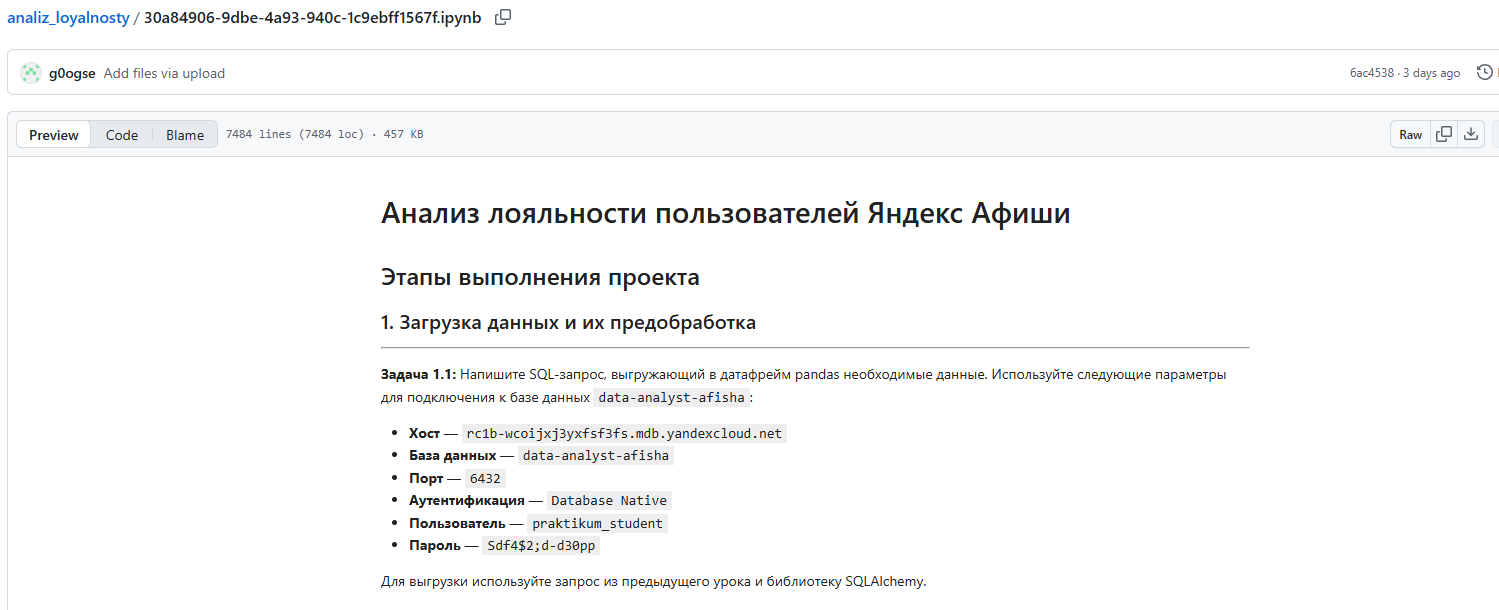

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут не исправлено - подскажи, пожалуйста, есть ли какие-то сложности с пониманием, что нужно сделать?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Я убрал данные и добавил загрузку с файл .env. Это все что нужно сделать?
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Это было последним замечанием, но, возможно, ты не сохранил обновление - в проекте в репозитории я всё ещё вижу прописанные во вступлении параметры подключения и их явное указание в параметрах:
    
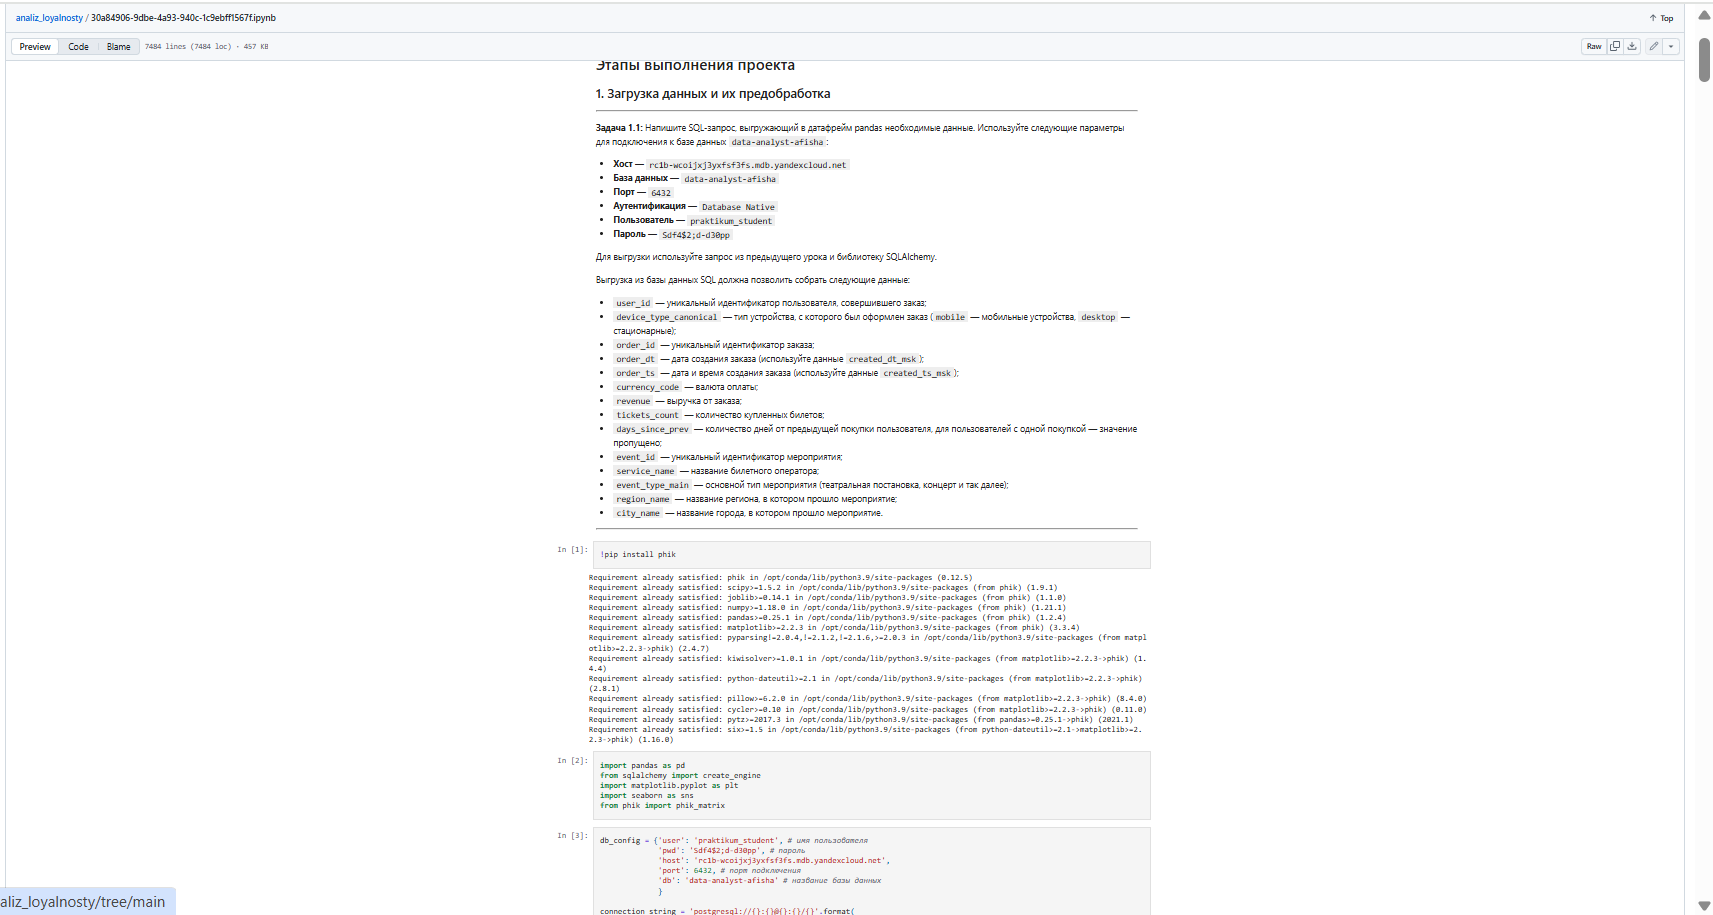

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Данил, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)